In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

# Read data

In [2]:
# select the crop
CROP = 'wheat'
#CROP = 'corn'
#CROP = 'soybeans'

data = pd.read_csv(CROP + '.csv')

## Columns (fields)

In [3]:
print(', '.join(data.columns)) 

year, month, open, close, open_net, close_net, open_rel, close_rel, volume, openint, day, date


## Contract information

In [4]:
_m = data['month'].unique()
_y = data['year'].drop_duplicates().sort_values()
print("{} years from {} to {}".format(len(_y), _y.iloc[0], _y.iloc[-1]))
print("{} months: {}".format(len(_m), ', '.join([str(a) for a in _m])))
_nmonths = len(_m)
_nyears = len(_y)
_contracts = data[['year', 'month']].drop_duplicates()
_ncontracts = len(_contracts)
_npossible = _nmonths * _nyears
print('Num of contracts {} {} possible {}'.format(_ncontracts, '=' if _ncontracts == _npossible else '<', _npossible ))

print('\ncontract\nmonth\t count')
for m in _m:
    print('{:5d} {:8d}'.format(m, len(data[data['month']==m]['year'].unique())))

44 years from 1959 to 2002
6 months: 7, 5, 9, 12, 3, 10
Num of contracts 216 < possible 264

contract
month	 count
    7       43
    5       43
    9       43
   12       43
    3       43
   10        1


# Support code

In [5]:
# plots important data for a single contract (year & month)
def contractPlots(df, year, month):
    print("Contract plots for {}/{}".format(year, month))
    row = df[(df['year'] == year) & (df['month'] == month)]

    plt.rcParams["figure.figsize"]=15,6
    plt.subplot(2, 1, 1)
    plt.plot(row['day'], row['close_net'], 'r-', label="close")
    plt.plot(row['day'], row['open_net'], 'b-', label='open')
    plt.grid(b=True, which='major')
    plt.ylabel('Net')
    plt.title('Price')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(row['day'], row['close_rel'], 'r-', label="close")
    plt.plot(row['day'], row['open_rel'], 'b-', label='open')
    plt.grid(b=True, which='major')
    plt.ylabel('Relative')
    plt.title('Price')
    plt.legend()
    plt.show()
    
    plt.rcParams["figure.figsize"]=15,3
    fig, ax1 = plt.subplots()
    ax1.plot(row['day'], row['volume'], 'b-', label='volume')
    ax1.set_ylabel('Contracts')
    ax1.grid(b=True, which='major')
    plt.title('Volume/OpenInt')
    
    ax2 = ax1.twinx()
    ax2.plot(row['day'], row['openint'], 'r-', label='openint')
    ax2.set_ylabel('Contracts')
    fig.legend()
    plt.show()
    

In [6]:
def yearPlots(df, year):
    yeardata = df[df['year'] == year]
    months = yeardata['month'].unique()
    for month in months:
        contractPlots(data, year, month)

In [7]:
def allYears(col, month):
    _df = data[data['month'] == month]
    years = pd.unique(_df['year'])
    plt.rcParams["figure.figsize"]=15,8
    for year in years:
        _df2 = _df[_df['year']==year]
        plt.plot(_df2['day'], _df2[col])
    plt.show()

In [8]:
def overallStats(dfin, month, days=200):
    netlist = []
    rellist = []
    varlist = []
    vollist = []
    openintlist = []
    days = range(days)

    df = dfin[dfin['month']==month]
    for i in days:
        netlist.append(df[df['day']==i]['close_net'].mean())
        rellist.append(df[df['day']==i]['close_rel'].mean())
        varlist.append(df[df['day']==i]['close_net'].var())
        vollist.append(df[df['day']==i]['volume'].mean())
        openintlist.append(df[df['day']==i]['openint'].mean())

    # close net & relative mean
    plt.rcParams["figure.figsize"]=15,3
    fig, ax1 = plt.subplots()
    # net
    ax1.plot(days, netlist, 'b-', label='net')
    ax1.grid(b=True, which='major')
    plt.title('Close')
    ax1.set_ylabel('Price')

    ax2 = ax1.twinx()
    ax2.plot(days, rellist, 'r-', label='relative')
    fig.legend()
    plt.show()
    
    # close net variance mean
    plt.plot(days, varlist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Net Close - Var')
    plt.ylabel('Variance')
    plt.show()

    # plot volume and openint
    plt.rcParams["figure.figsize"]=15,3
    fig, ax1 = plt.subplots()
    ax1.plot(days, vollist, 'b-', label='volume')
    ax1.grid(b=True, which='major')
    plt.title('Mean Volume/OpenInt')
    ax1.set_ylabel('Contracts')

    ax2 = ax1.twinx()
    ax2.plot(days, openintlist, 'r-', label='openint')
    fig.legend()
    plt.show()

## Contract plots one contract

Contract plots for 1989/3


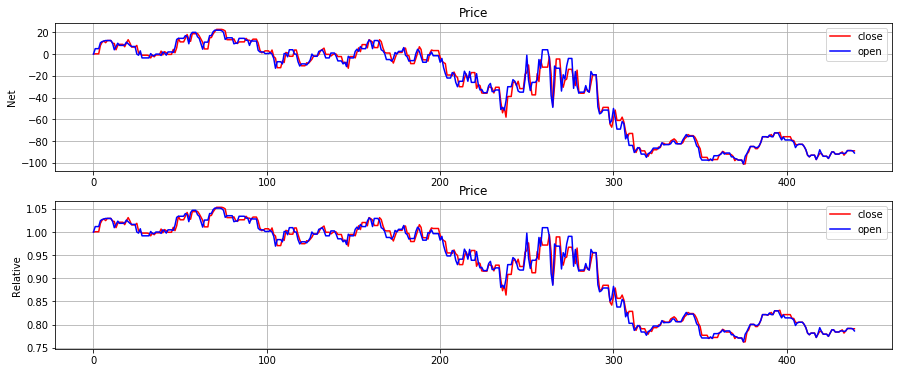

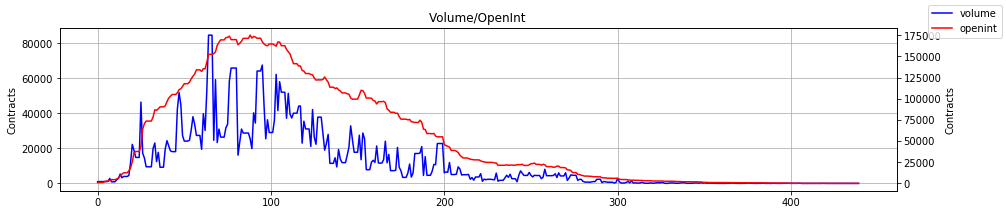

In [9]:
year = 1989
month = 3
contractPlots(data, year, month)

# Contract plots for a year

Contract plots for 2002/9


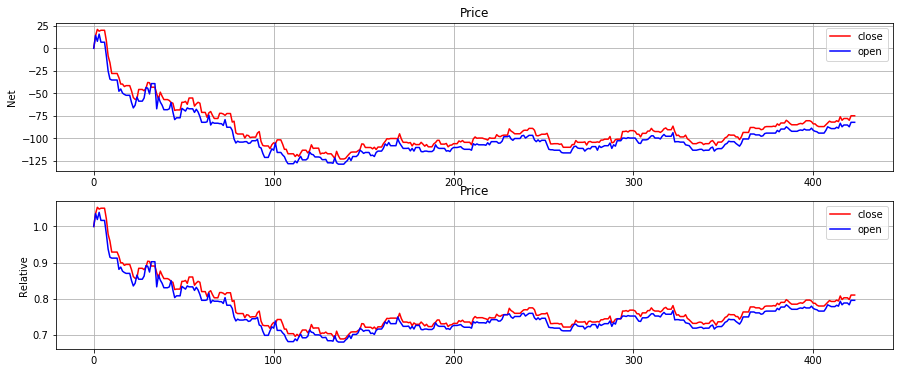

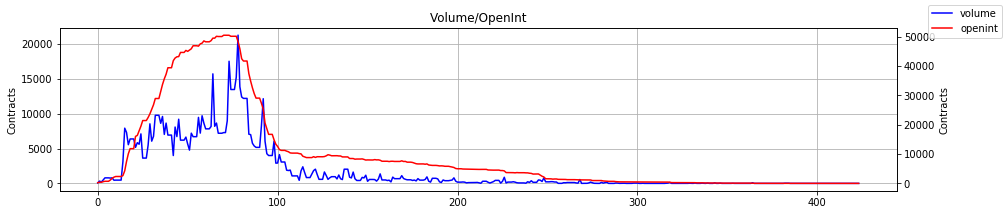

Contract plots for 2002/10


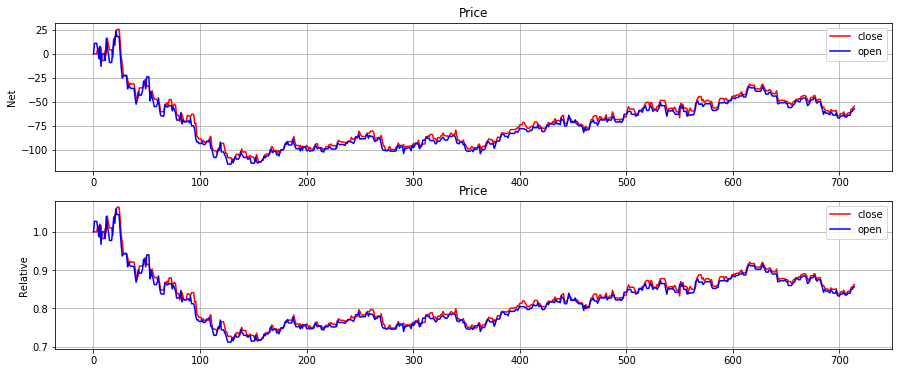

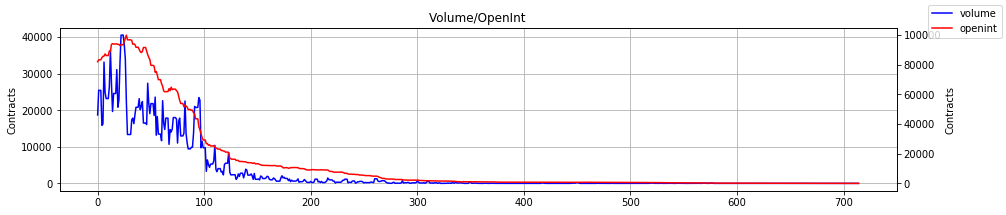

Contract plots for 2002/3


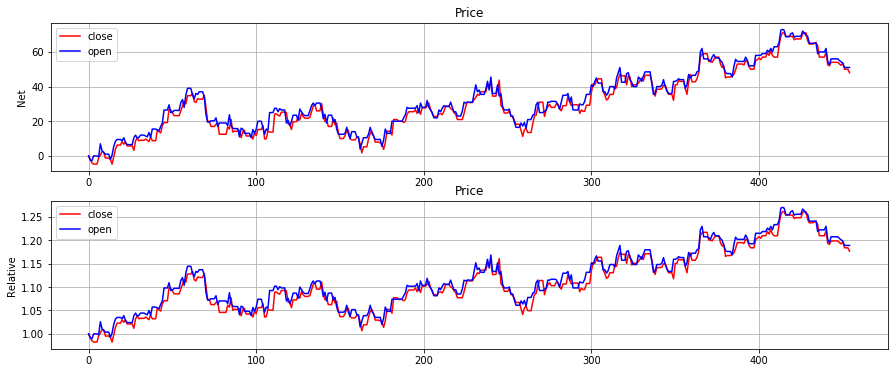

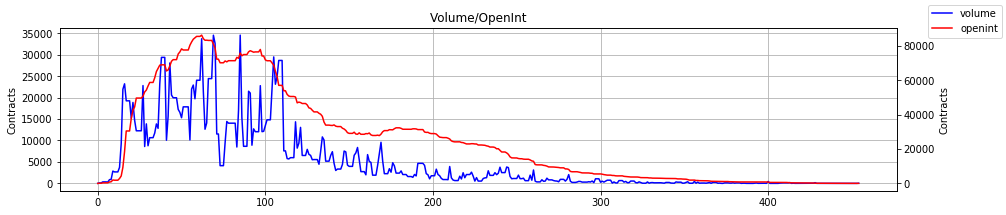

Contract plots for 2002/5


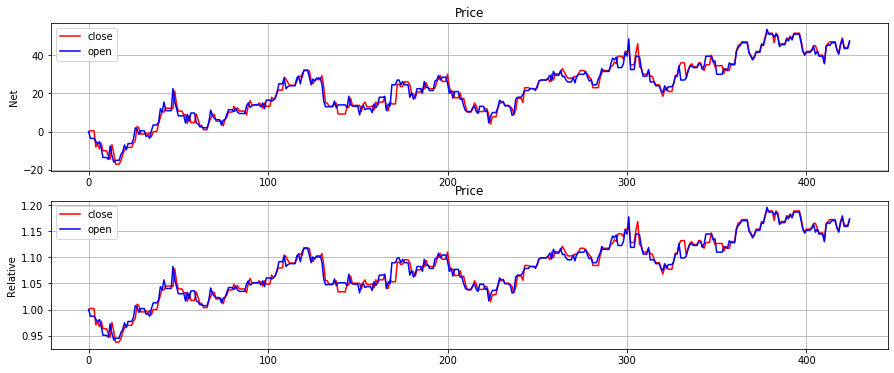

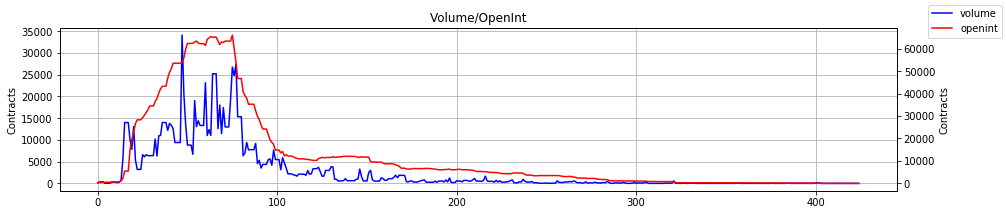

Contract plots for 2002/7


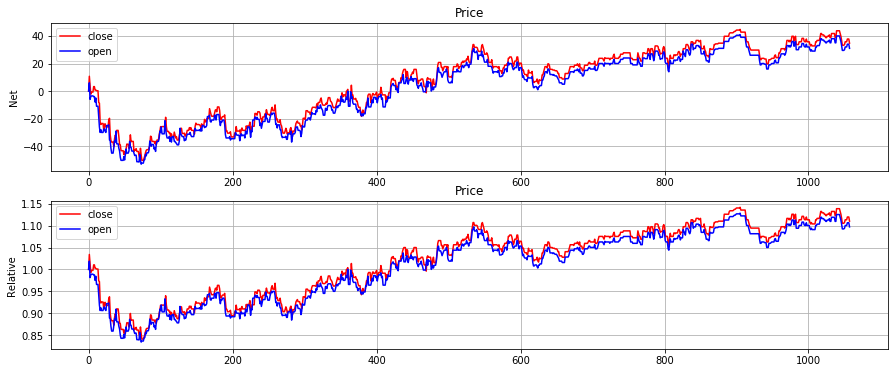

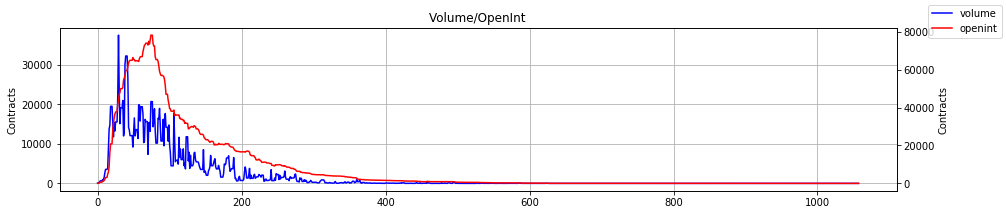

In [17]:
yearPlots(data, 2002)

## All years: Net close

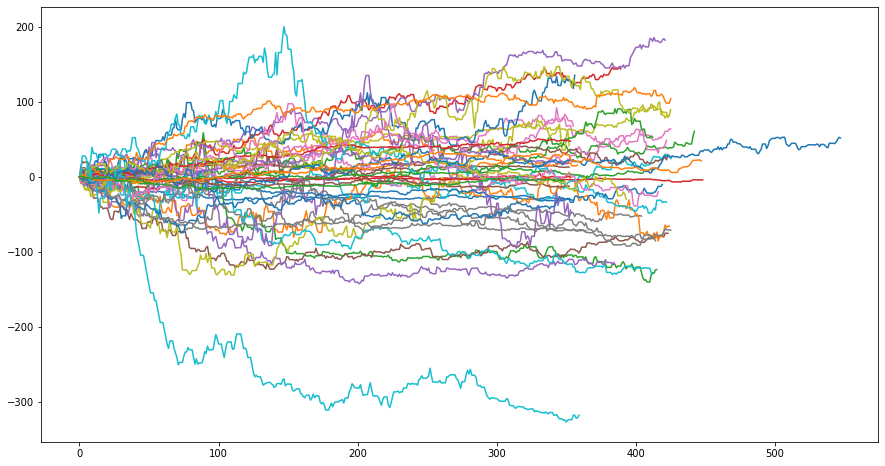

In [11]:
month = 9
allYears('close_net', month)

## All years: Relative close

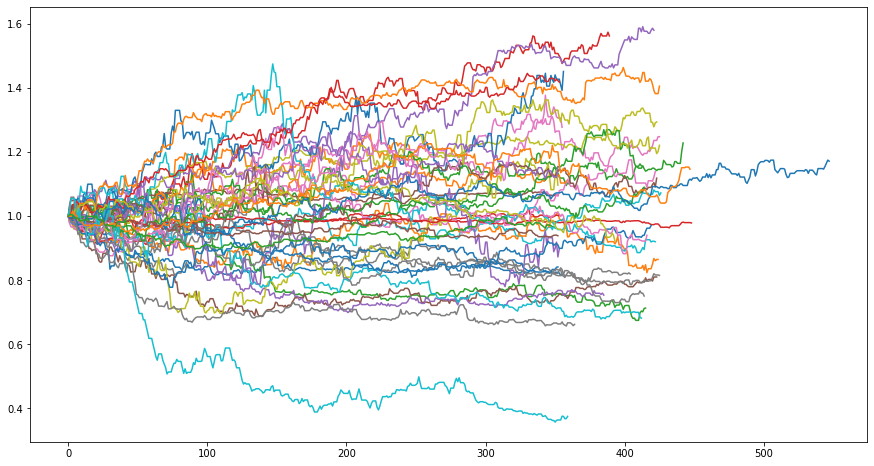

In [12]:
month = 9
allYears('close_rel', month)

# Overall statistics
The plots below show the aggregate (mean or variance) of all years by day. For example, at 200 on the x-axis, we see the average of all net close prices 200 days before the contract end.

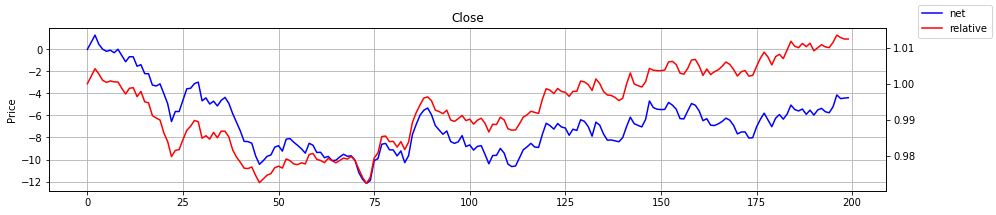

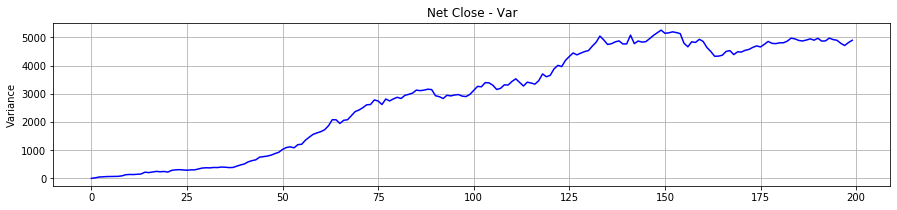

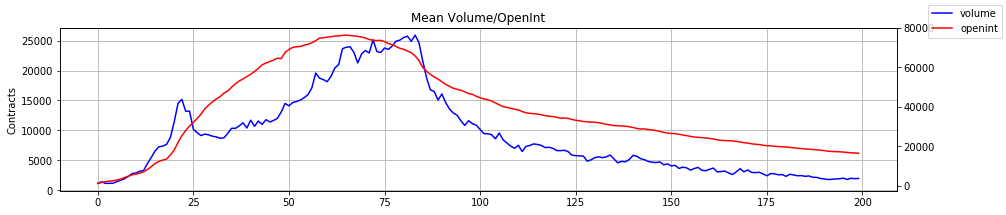

In [13]:
overallStats(data, 9)